In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def convert_time(ts):
    # convert into a datetime obj with microsecs
    dt = datetime.strptime(ts, '%Y-%m-%dT%H:%M:%S.%fZ')
    return dt

In [3]:
df = pd.read_csv('results450.csv')
df = df.sort_values('@timestamp')

# convert the timestamp into a datetime obj
df.insert(0, 'timestamp', df['@timestamp'].apply(convert_time))

# drop the original timestamp field 
df = df.drop(['@timestamp'],1)

In [11]:
ts = datetime(2016,4,7,21,35,0,0)
te = datetime(2016,4,8,1,10,0,0)
df = df[(df['timestamp'] > ts) & (df['timestamp'] < te)]

# Data Exploration 

We start the exploration by converting all the original timestamp into a Python datetime object. This will allow us to compare the time to find where the simulation starts and ends.

We being feature engineering:
- check rank
- sample time?

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


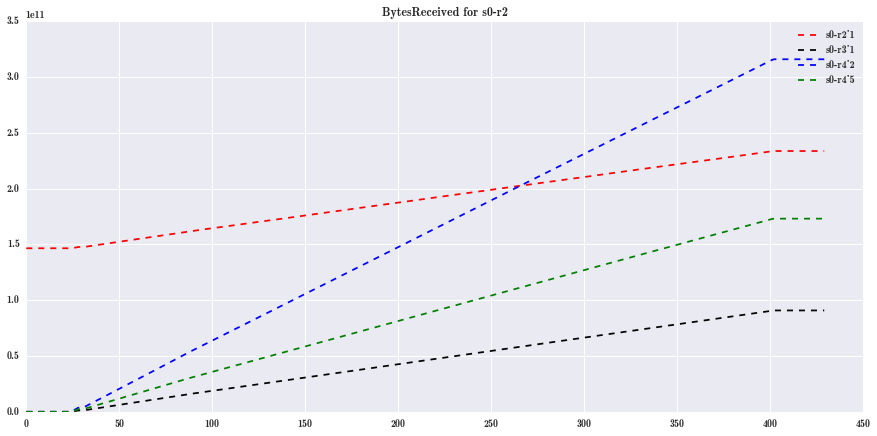

In [5]:
#z = df[['timestamp', 'hostname', 'content.key.InterfaceName', 'content.generic_counters.BytesSent', \
#        'content.generic_counters.BytesReceived']]

z2_1 = df[(df['hostname'] == 's0-r2') & (df['content.key.InterfaceName'] == 'GigabitEthernet0/0/0/1')]

z3_1 = df[(df['hostname'] == 's0-r3') & (df['content.key.InterfaceName'] == 'GigabitEthernet0/0/0/1')]
z3_2 = df[(df['hostname'] == 's0-r3') & (df['content.key.InterfaceName'] == 'GigabitEthernet0/0/0/2')]
z3_5 = df[(df['hostname'] == 's0-r3') & (df['content.key.InterfaceName'] == 'GigabitEthernet0/0/0/5')]

z4_2 = df[(df['hostname'] == 's0-r4') & (df['content.key.InterfaceName'] == 'GigabitEthernet0/0/0/2')]
z4_5 = df[(df['hostname'] == 's0-r4') & (df['content.key.InterfaceName'] == 'GigabitEthernet0/0/0/5')]

fig, ax = plt.subplots(figsize=(15,7))
plt.plot(z2_1['content.generic_counters.BytesReceived'], '--', c='r', label='s0-r2_1')
plt.plot(z3_1['content.generic_counters.BytesReceived'], '--', c='k', label='s0-r3_1')
plt.plot(z4_2['content.generic_counters.BytesReceived'], '--', c='b', label='s0-r4_2')
plt.plot(z4_5['content.generic_counters.BytesReceived'], '--', c='g', label='s0-r4_5')
plt.title('BytesReceived for s0-r2')
plt.legend()

In [6]:
fin_df = df
fin_df = fin_df.drop(['content.generic_counters.RuntPacketsReceived', 'content.generic_counters.CRCErrors',\
               'content.generic_counters.ThrottledPacketsReceived', 'content.generic_counters.InputQueueDrops',\
               'content.generic_counters.InputOverruns', 'content.generic_counters.ParityPacketsReceived', \
               'content.generic_counters.Applique','content.generic_counters.InputIgnoredPackets',\
               'content.generic_counters.OutputErrors', 'content.generic_counters.OutputUnderruns', \
               'content.generic_counters.SecondsSinceLastClearCounters', \
               'content.generic_counters.GiantPacketsReceived', 'content.generic_counters.UnknownProtocolPacketsReceived',\
               'content.generic_counters.FramingErrorsReceived', 'content.generic_counters.OutputQueueDrops',\
               'content.generic_counters.Resets', 'content.generic_counters.InputAborts', \
               'content.generic_counters.OutputBuffersSwappedOut', 'content.generic_counters.InputErrors', \
               'content.generic_counters.InputDrops', 'content.generic_counters.OutputDrops', \
               'content.generic_counters.OutputBufferFailures', 'content.generic_counters.CarrierTransitions', \
               'content.generic_counters.AvailabilityFlag'], axis=1)

fin_df = fin_df.set_index('timestamp', drop=True)

In [7]:
#np.log(fin_df['content.generic_counters.MulticastPacketsSent'])
#pd.get_dummies(df, columns=)

In [8]:
fin_df.head()

,content.generic_counters.MulticastPacketsSent,content.generic_counters.LastDiscontinuityTime,content.generic_counters.MulticastPacketsReceived,content.generic_counters.PacketsReceived,content.generic_counters.LastDataTime,hostname,content.key.InterfaceName,content.generic_counters.BytesReceived,content.delta.BytesSent,content.generic_counters.BytesSent,content.generic_counters.SecondsSincePacketReceived,content.generic_counters.BroadcastPacketsSent,content.delta.BytesReceived,content.generic_counters.BroadcastPacketsReceived,content.delta.PacketsReceived,content.delta.PacketsSent,content.generic_counters.PacketsSent,content.generic_counters.SecondsSincePacketSent
timestamp,,,,,,,,,,,,,,,,,,
2016-04-07 21:35:07.777,2,1458577061,134,159,1460064893,s0-r2,GigabitEthernet0/0/0/6,159602,0.0,182,5948,1,0.0,16,0.0,0.0,3,1487820
2016-04-07 21:35:07.777,31052,1458577061,24920,75893628,1460064893,s0-r2,GigabitEthernet0/0/0/5,10168028569,1035.0,276619903,9,1,862.0,19,8.0,14.0,3801128,9
2016-04-07 21:35:07.777,2,1458577061,134,159,1460064893,s0-r2,GigabitEthernet0/0/0/7,159602,0.0,182,5948,1,0.0,16,0.0,0.0,3,1487820
2016-04-07 21:35:07.777,563064,1458577061,152457,2252998,1460064893,s0-r2,GigabitEthernet0/0/0/0,350107863,18438.0,7611072853,0,26,6688.0,20,8.0,19.0,5934415,0
2016-04-07 21:35:07.778,33046,1458577061,0,68266344,1460064893,s0-r2,GigabitEthernet0/0/0/3,13294271089,1004.0,145982845030,14,2,654.0,3,7.0,14.0,103462508,14


In [9]:
fin_df.columns

Index([u'content.generic_counters.MulticastPacketsSent',
       u'content.generic_counters.LastDiscontinuityTime',
       u'content.generic_counters.MulticastPacketsReceived',
       u'content.generic_counters.PacketsReceived',
       u'content.generic_counters.LastDataTime', u'hostname',
       u'content.key.InterfaceName', u'content.generic_counters.BytesReceived',
       u'content.delta.BytesSent', u'content.generic_counters.BytesSent',
       u'content.generic_counters.SecondsSincePacketReceived',
       u'content.generic_counters.BroadcastPacketsSent',
       u'content.delta.BytesReceived',
       u'content.generic_counters.BroadcastPacketsReceived',
       u'content.delta.PacketsReceived', u'content.delta.PacketsSent',
       u'content.generic_counters.PacketsSent',
       u'content.generic_counters.SecondsSincePacketSent'],
      dtype='object')